In [1]:
import pandas as pd

In [3]:
name1880 = pd.read_csv('/Users/zhangchen/Downloads/names/yob1880.txt',names = ['name', 'sex', 'births'])

In [4]:
name1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [5]:
name1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [6]:
name1880.groupby('sex').sum('births')

TypeError: f() takes 1 positional argument but 2 were given

In [8]:
name1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [10]:
years = range(1880,2011)
pieces = []
for year in years:
    path = '/Users/zhangchen/Downloads/names/yob%d.txt' %year
    name =['name', 'sex', 'births']
    file = pd.read_csv(path, names = name)
    file['year'] = year
    pieces.append(file)
names = pd.concat(pieces,ignore_index=True)

In [11]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692112 entries, 0 to 1692111
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [12]:
bbnames = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
bbnames.plot(title = 'Total births by sex and year')

In [38]:
def add_prop(group):
    group['prop']= group.births/group.births.sum()
    return(group)
names = names.groupby(['year','sex']).apply(add_prop)
names.info()
names.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692112 entries, 0 to 1692111
Data columns (total 5 columns):
name      object
sex       object
births    int64
year      int64
prop      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 64.5+ MB


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [15]:
import numpy as np

In [16]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [39]:
def top_1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]    
top1000 = names.groupby(['year','sex']).apply(top_1000)
top1000.info()
top1000.head()

/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please us

/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please us

/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please us

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261877 entries, (1880, F, 0) to (2010, M, 1678853)
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ MB


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [22]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [40]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [51]:
top1000.reset_index(drop=True, inplace = True)

In [52]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [53]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)

In [54]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13c3849b0>,
      dtype=object)

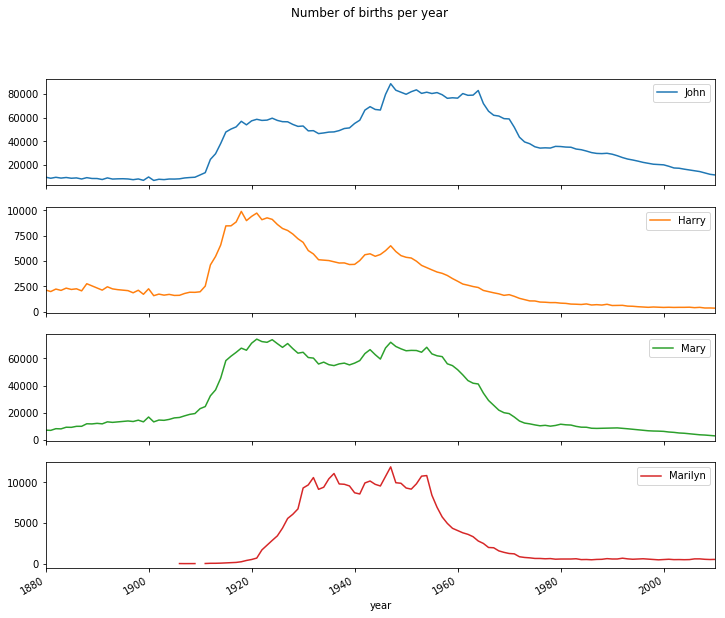

In [57]:
subset.plot(subplots = True, figsize = (12,10), grid = False, title = "Number of births per year")

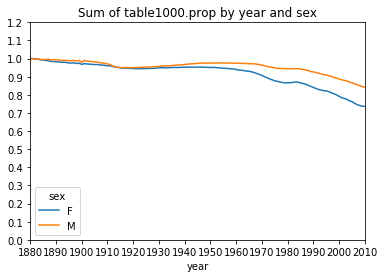

In [63]:
table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)
table.plot(title = 'Sum of table1000.prop by year and sex', yticks = np.linspace(0,1.2,13), xticks = np.arange(1880,2011,10))

In [64]:
df = boys[boys.year==2010]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000 entries, (2010, M, 1677854) to (2010, M, 1678853)
Data columns (total 5 columns):
name      1000 non-null object
sex       1000 non-null object
births    1000 non-null int64
year      1000 non-null int64
prop      1000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB


In [67]:
prop_cumsum = df.sort_index(by = 'prop', ascending = False).prop.cumsum()

/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [68]:
prop_cumsum.searchsorted(0.5)

116

In [69]:
df = boys[boys.year == 1900]

In [71]:
prop_cumsum = df.sort_index(by = 'prop',ascending = False).prop.cumsum()

/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [73]:
prop_cumsum.searchsorted(0.5)

24

In [84]:
def prop_cum(group):
    prop_cumsum = group.sort_index(by = 'prop', ascending = False).prop.cumsum()
    return(prop_cumsum.searchsorted(0.5)+1)
div = top1000.groupby(['year','sex']).apply(prop_cum)
div1 = div.unstack('sex')

/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please us

/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please us

/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please us

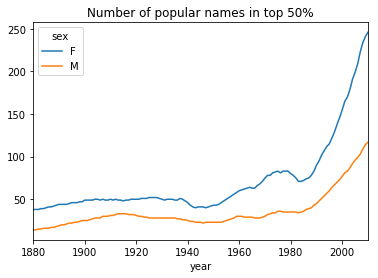

In [85]:
div1.plot(title = 'Number of popular names in top 50%')

In [87]:
get_last_name = lambda x: x[-1]
last_letters = names.name.map(get_last_name)
last_letters.name = 'last_letter'

In [99]:
table = names.pivot_table('births', index = last_letters, columns = ['sex','year'], aggfunc = sum)
subtable = table.reindex(columns = [1910, 1960, 2010],level='year')

In [100]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691261.0  676865.0    977.0    5212.0   28868.0
b                 NaN     694.0     455.0    411.0    3912.0   39276.0
c                 5.0      49.0     956.0    482.0   15454.0   23348.0
d              6751.0    3731.0    2642.0  22113.0  262116.0   44828.0
e            133601.0  435030.0  316764.0  28665.0  178768.0  130253.0

In [101]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
dtype: float64

In [105]:
letter_prop=subtable/subtable.sum().astype(float)

In [106]:
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341868  0.381258  0.005031  0.002444  0.015063
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020494
c            0.000013  0.000024  0.000538  0.002482  0.007248  0.012183
d            0.017026  0.001845  0.001488  0.113860  0.122935  0.023391
e            0.336947  0.215147  0.178424  0.147596  0.083844  0.067965

In [107]:
import matplotlib.pyplot as plt

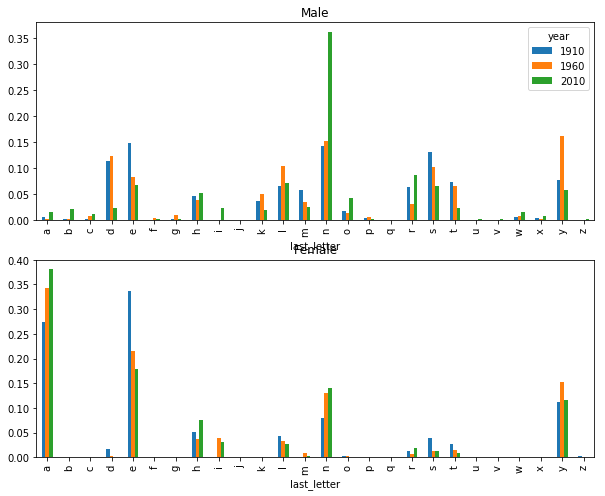

In [108]:
fig, axs = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',ax=axs[0],title='Male')
letter_prop['F'].plot(kind='bar',ax=axs[1],title='Female',legend = False)

KeyError: '[1910] not in index'

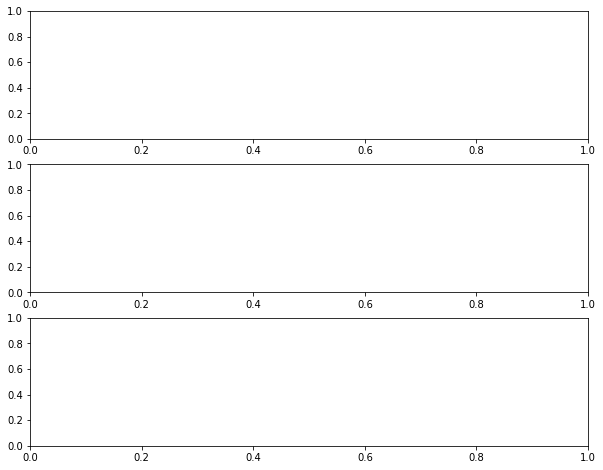

In [115]:
fig, axs = plt.subplots(3,1,figsize=(10,8))
letter_prop['1910'].plot(kind = 'bar', ax = axs[0], title = '1910')
letter_prop['1960'].plot(kind = 'bar', ax = axs[1], title = '1960',legend = False)
letter_prop['2010'].plot(kind = 'bar', ax = axs[2], title = '2010',legend = False)

In [120]:
letter_prop = table/table.sum()

In [121]:
dny_ts = letter_prop.ix[['d', 'n', 'y'],'M'].T

/Users/zhangchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [122]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


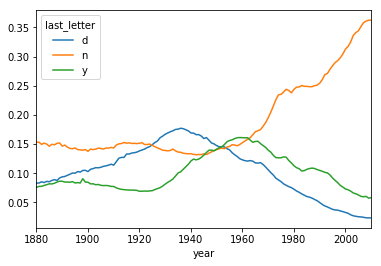

In [123]:
dny_ts.plot()

In [126]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]

In [127]:
lesley_like 

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [128]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    370568
Lesly      10072
Name: births, dtype: int64

In [129]:
table = filtered.pivot_table('births',index='year', columns='sex', aggfunc = sum)

In [130]:
table.tail()

sex,F,M
year,,
2006,4168.0,NaN
2007,3808.0,NaN
2008,3024.0,NaN
2009,2579.0,NaN
2010,2070.0,NaN


In [132]:
table=table.div(table.sum(1),axis = 0)

In [133]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


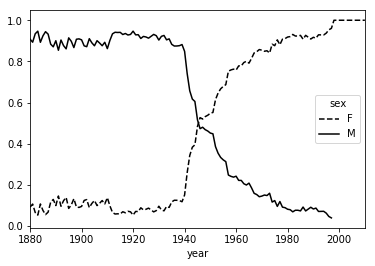

In [134]:
table.plot(style={'M':'k-','F':'k--'})